In [1]:
# if hit plotting library issues, try resetting LD path for julia
# can set in ~/.local/share/jupyter/kernels/
haskey(ENV, "LD_LIBRARY_PATH") && @assert ENV["LD_LIBRARY_PATH"] == ""
import Pkg
pkgs = [
    "Revise",
    "FASTX",
    "BioSequences",
    "Kmers",
    "Graphs",
    "MetaGraphs",
    "SparseArrays",
    "ProgressMeter",
    "Distributions",
    "HiddenMarkovModels",
    "BioAlignments",
    "StatsBase",
    "Random",
    "StatsPlots",
    "Statistics",
    # "GraphMakie",
    "IterTools",
    "Primes",
    "OnlineStats",
    "IteratorSampling",
    "HypothesisTests",
    "Clustering",
    "Distances",
    "BioAlignments",
    "Statistics",
    "Primes",
    "DataFrames",
    "BioSymbols",
    "LinearAlgebra"
]
# Pkg.add(pkgs)
for pkg in pkgs
    eval(Meta.parse("import $pkg"))
end
# Pkg.develop(path="/global/cfs/projectdirs/m4269/cjprybol/Mycelia")
# Pkg.develop(path="../../..")
import Mycelia

┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ /global/cfs/cdirs/m4269/cjprybol/Mycelia/Manifest.toml:0
[ Info: Precompiling Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd]
[ Info: Skipping precompilation since __precompile__(false). Importing Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd].


In [2]:
PROJECT_BASEDIR = dirname(pwd())
data_dir = joinpath(PROJECT_BASEDIR, "data")
genome_dir = mkpath(joinpath(data_dir, "genomes"))

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes"

In [3]:
working_dir = joinpath(data_dir, "test")
mkpath(working_dir)

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/test"

In [4]:
short_read_sets = unique(map(x -> match(r"^(.+\.\d+x)\.", x).captures[1], filter(x -> occursin(r"\.fna\.art", x) && occursin(r"\.fq\.gz", x) && !occursin("trimming_report", x) && !occursin("_val_", x), sort(readdir(genome_dir, join=true), by=x->filesize(x)))))


18-element Vector{SubString{String}}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 68 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 69 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 71 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 70 bytes ⋯ "na.normalized.vcf.fna.art.1000x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 77 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 72 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 73 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 78 bytes ⋯ "na.normalized.vcf.fna.art.1000x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 73 bytes ⋯ "na.normaliz

In [5]:
# short_read_set = short_read_sets[1]
# short_read_set = short_read_sets[2]
# short_read_set = short_read_sets[3]
# short_read_set = short_read_sets[4]
short_read_set = short_read_sets[5]

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x"

In [6]:
forward = short_read_set * ".1_val_1.fq.gz"
reverse = short_read_set * ".2_val_2.fq.gz"

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x.2_val_2.fq.gz"

In [7]:
short_read_set_joint_fastq = short_read_set * ".joint.fq.gz"
if !isfile(short_read_set_joint_fastq)
    run(pipeline(`cat $(forward) $(reverse)`, short_read_set_joint_fastq))
end
short_read_set_joint_fastq
original_fastq = short_read_set_joint_fastq

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x.joint.fq.gz"

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 3, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 130], [0, 1, 9, 31, 32], false)
  4.667683 seconds (1.46 M allocations: 92.618 MiB, 0.95% gc time, 99.99% compilation time)
(k, predicted_saturation) = (3, 1.0)


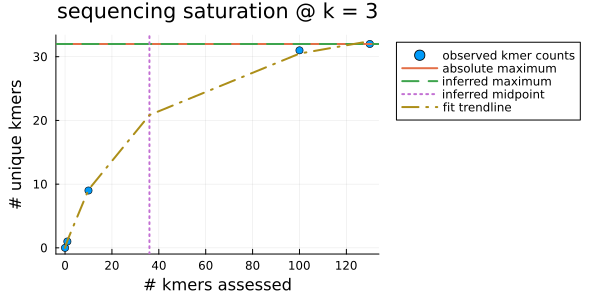

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 5, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 100000, 359648], [0, 1, 10, 91, 364, 440, 489, 512], false)
  0.000108 seconds (194 allocations: 19.797 KiB)
(k, predicted_saturation) = (5, 1.0)


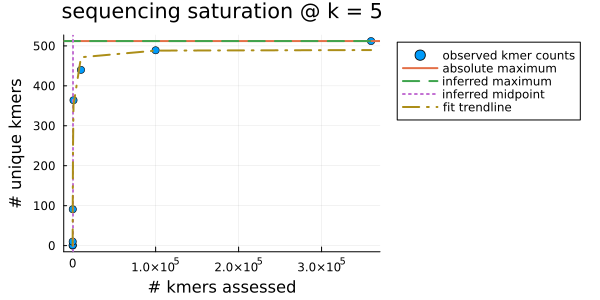

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 7, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 100000, 861359], [0, 1, 10, 99, 627, 1045, 1792, 5632], true)
  0.000074 seconds (245 allocations: 25.391 KiB)
(k, predicted_saturation) = (7, 0.6875)


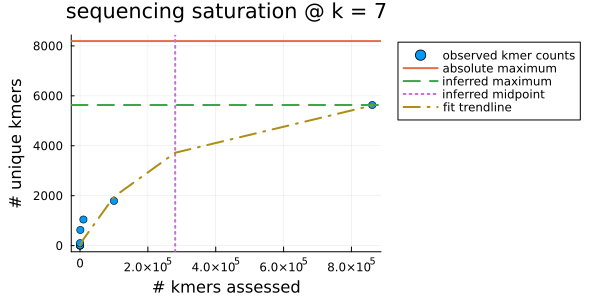

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 11, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 100000, 837359], [0, 1, 10, 100, 658, 1194, 2641, 14222], true)
  0.000082 seconds (265 allocations: 27.500 KiB)
(k, predicted_saturation) = (11, 0.006781578063964844)


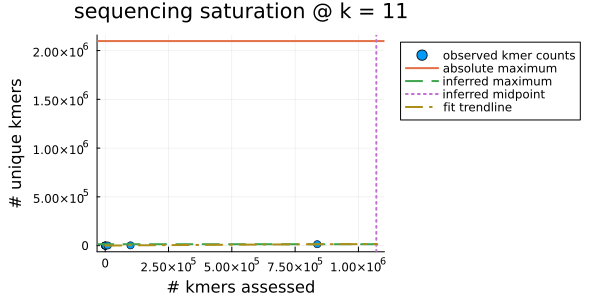

[ Info: polishing with k = 11
Progress: 100%|█████████████████████████████████████████| Time: 0:11:52
[ Info: polishing with k = 13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
[ Info: polishing with k = 17
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
[ Info: polishing with k = 19
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
[ Info: polishing with k = 23
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 31
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
[ Info: polishing with k = 53
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
[ Info: polishing with k = 89
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


8-element Vector{@NamedTuple{fastq::String, k::Int64}}:
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x.joint.k11.fq.gz", k = 11)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x.joint.k11.k13.fq.gz", k = 13)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x.joint.k11.k13.k17.fq.gz", k = 17)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x.joint.k11.k13.k17.k19.fq.gz", k = 19)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x.joint.k11.k13.k17.k19.k23.fq.gz", k = 23)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/pr

KeyError: KeyError: key "usage_request" not found

In [8]:
# almost no time at all for short reads
polishing_results = Mycelia.iterative_polishing(original_fastq)

In [9]:
assembly_fastq = last(polishing_results).fastq
# assembly_fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.joint.k11.k13.k17.k19.k23.k31.k53.k89.fq.gz"

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x.joint.k11.k13.k17.k19.k23.k31.k53.k89.fq.gz"

In [10]:
# assembly_k = last(polishing_results).k
assembly_k = 89

89

In [11]:
mean_read_length = Statistics.mean([length(FASTX.sequence(record)) for record in Mycelia.open_fastx(assembly_fastq)])

149.42083333333332

In [12]:
kmer_graph = Mycelia.build_directed_kmer_graph(fastq=assembly_fastq, k=assembly_k)

{2045, 2043} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [13]:
# heuristic - should be based on something better or removed altogether
max_filter = 5

initial_connected_components = length(Graphs.connected_components(kmer_graph))
coverage_threshold = 1
tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
while (length(Graphs.connected_components(candidate_subgraph)) == initial_connected_components) && (coverage_threshold < max_filter)
    coverage_threshold += 1
    tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
    candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
end
coverage_threshold -= 1
@show coverage_threshold

tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
filtered_graph, filtered_graph_vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
# candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, [v for v in Graphs.vertices(kmer_graph) if kmer_graph.vprops[v][:count] >= coverage_threshold])

coverage_threshold = 4


({1181, 1179} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0), [1, 2, 3, 5, 6, 9, 10, 11, 14, 15  …  2025, 2029, 2032, 2034, 2036, 2037, 2039, 2042, 2043, 2045])

In [14]:
connected_components = sort(Graphs.connected_components(filtered_graph), by=x->length(x), rev=true)

2-element Vector{Vector{Int64}}:
 [7, 8, 10, 11, 12, 13, 14, 15, 19, 29  …  1158, 1164, 1166, 1167, 1170, 1171, 1172, 1173, 1179, 1181]
 [1, 2, 3, 4, 5, 6, 9, 16, 17, 18  …  1163, 1165, 1168, 1169, 1174, 1175, 1176, 1177, 1178, 1180]

In [15]:
length.(connected_components)

2-element Vector{Int64}:
 594
 587

In [16]:
connected_component_sequences = BioSequences.LongDNA{2}[]
for connected_component in connected_components
    connected_component_subgraph, connected_component_subgraph_vertex_map = Graphs.induced_subgraph(filtered_graph, connected_component)
    sorted_connected_component_subgraph = Graphs.topological_sort_by_dfs(connected_component_subgraph)
    dsp_result = Graphs.dijkstra_shortest_paths(connected_component_subgraph, first(sorted_connected_component_subgraph))
    maxdist, maxdist_index = findmax(map(d -> d == Inf ? zero(d) : d, dsp_result.dists))
    connected_component_subgraph_longest_path = Graphs.enumerate_paths(dsp_result, maxdist_index)
    # @show connected_component_subgraph_longest_path
    original_graph_kmer_indices = filtered_graph_vertex_map[connected_component_subgraph_vertex_map[connected_component_subgraph_longest_path]]
    connected_component_subgraph_longest_path_reconstructed_sequence = Mycelia.kmer_path_to_sequence(kmer_graph.gprops[:ordered_kmers][original_graph_kmer_indices])
    push!(connected_component_sequences, connected_component_subgraph_longest_path_reconstructed_sequence)
end
connected_component_sequences
length.(connected_component_sequences)

2-element Vector{Int64}:
 682
 675

In [17]:
# first_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[1]))))
# second_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[2]))))
# intersect(first_sequence_canonical_kmers, second_sequence_canonical_kmers)

In [18]:
assembled_contig_quality_table = DataFrames.DataFrame()
for (i, connected_component_sequence) in enumerate(connected_component_sequences)
    this_table = Mycelia.assess_assembly_quality(assembled_sequence=connected_component_sequence, fastq=original_fastq)
    this_table[!, "contig"] .= "$(i)"
    this_table[!, "contig_length"] .= length(connected_component_sequence)
    append!(assembled_contig_quality_table, this_table)
end
assembled_contig_quality_table

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Row,k,cosine_distance,js_divergence,qv,contig,contig_length
,Int64,Float64,Float64,Float64,String,Int64
1,11,0.0,0.0,Inf,1,682
2,13,0.0,0.0,Inf,1,682
3,17,0.0,0.0,Inf,1,682
4,19,0.0,0.0,Inf,1,682
5,23,0.0,0.0,Inf,1,682
6,31,0.0,0.0,Inf,1,682
7,53,2.22045e-16,0.0,29.6743,1,682
8,11,0.0,0.0,Inf,2,675
9,13,0.0,0.0,24.4909,2,675


In [19]:
function find_canonical_kmer_overlaps(sequences, k)
    sequence_canonical_kmers = keys.(Mycelia.count_canonical_kmers.(Kmers.DNAKmer{k}, sequences))
    canonical_kmer_intersect_sizes = zeros(length(sequence_canonical_kmers), length(sequence_canonical_kmers))
    for (a, aset) in enumerate(sequence_canonical_kmers)
        for (b, bset) in enumerate(sequence_canonical_kmers)
            canonical_kmer_intersect_sizes[a, b] = length(intersect(aset, bset))
        end
    end
    canonical_kmer_intersect_sizes
end

function find_best_kmer_intersect(canonical_kmer_intersect_sizes)
    off_diagonal_mask = .!Matrix(LinearAlgebra.I, size(canonical_kmer_intersect_sizes))
    max_off_diagonal_score = maximum(canonical_kmer_intersect_sizes[off_diagonal_mask])
    @assert max_off_diagonal_score > 0
    return findfirst(canonical_kmer_intersect_sizes .== max_off_diagonal_score)
end

function dna_pair_align(seq1, seq2, scoremodel = BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-1))
    BioAlignments.pairalign(BioAlignments.OverlapAlignment(), seq1, seq2, scoremodel)
end

function find_best_alignment(seq1, seq2, scoremodel = BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-1))
    forward_alignment = dna_pair_align(seq1, seq2, scoremodel)
    reverse_complement_alignment = dna_pair_align(seq1, BioSequences.reverse_complement(seq2), scoremodel)
    if BioAlignments.score(forward_alignment) > BioAlignments.score(reverse_complement_alignment)
        best_alignment = forward_alignment
    else
        best_alignment = reverse_complement_alignment
    end
    return best_alignment
end

function pairwise_align_sequences(sequences)
    best_pairwise_alignments = Array{Any}(undef, length(sequences), length(sequences))
    ProgressMeter.@showprogress for (a, a_seq) in enumerate(sequences)
        for (b, b_seq) in enumerate(sequences)
            best_pairwise_alignments[a, b] = find_best_alignment(a_seq, b_seq)
        end
    end
    best_pairwise_alignments
end

function find_best_alignment(best_pairwise_alignments)
    alignment_scores = BioAlignments.score.(best_pairwise_alignments)
    off_diagonal_mask = .!Matrix(LinearAlgebra.I, size(best_pairwise_alignments))
    max_off_diagonal_score = maximum(alignment_scores[off_diagonal_mask])
    return findfirst(alignment_scores .== max_off_diagonal_score)
end

"""
pass in alignment_result.aln or BioAlignments.alignment(alignment_result)
"""
function consensus_sequence(alignment)
    consensus_symbols = BioSymbols.DNA[]
    for alignment_tuple in collect(alignment)
        push!(consensus_symbols, rand(filter(x -> x != BioSymbols.DNA_Gap, alignment_tuple)))
    end
    consensus_seq = BioSequences.LongDNA{2}(consensus_symbols)
    return consensus_seq
end

consensus_sequence

In [20]:
assembly_sequences = deepcopy(connected_component_sequences)

2-element Vector{BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
 TCAAGATTGGTGCTTGCGTTCTCTAGGTAGGACTTACGC…GTTTAGGCCCAATGCTACTGCTTGTTGGCGCGTATCTCT
 TGTGACGGTTGAGGGTGTTCTACTTTGGGTCTGCCGTAA…TTCGGCACGCGTAACCGGCACTGTATCCGGCGTATGACG

In [21]:
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1695
  seq:   1 TGTGACGGTTGAGGGTGTTCTACTTTGGGTCTGCCGTAACTACCATTAACGCTTGGGGGT  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 GTTGGATCTAACGAGCTGCAGTACGAGAGATTCGGATACTGAGCTCGAGCAGTCAAGTCA 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 ATTGTTTTTCGCAGAGTCCGCGAGCACCCATGGAGCGTCCGCACACACGTAGCCATTGGG 180
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 181 GACACGCCCATTGATCCATGGGATGAACCTGGGTCGTGGAGCCGGAGAGCTTAACACGTG 240
                                                                       
  ref

In [24]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))

1018nt DNA Sequence:
TGTGACGGTTGAGGGTGTTCTACTTTGGGTCTGCCGTAA…GCGTAAGTCCTACCTAGAGAACGCAAGCACCAATCTTGA

In [25]:
final_assembly_sequences = [alignment_consensus]

1-element Vector{BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
 TGTGACGGTTGAGGGTGTTCTACTTTGGGTCTGCCGTAA…GCGTAAGTCCTACCTAGAGAACGCAAGCACCAATCTTGA

In [26]:
sum(length.(final_assembly_sequences))

1018

In [27]:
assembly_fasta = replace(assembly_fastq, Mycelia.FASTQ_REGEX => ".assembly_k$(assembly_k).fna")
open(assembly_fasta, "w") do io
    fastx_io = FASTX.FASTA.Writer(io)
    for (i, sequence) in enumerate(final_assembly_sequences)
        identifier = "contig$(i)_length=$(length(sequence))"
        fasta_record = FASTX.FASTA.Record(identifier, sequence)
        write(fastx_io, fasta_record)
    end
    close(fastx_io)
end
assembly_fasta

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x.joint.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k89.fna"

KeyError: KeyError: key "usage_request" not found

KeyError: KeyError: key "usage_request" not found